# Laboratório de Python da disciplina EDB - UFMG


## Série de Fourier de uma função contínua.


**Conteúdos:**

[1. Configurações iniciais.](#sec1) 

[2. Somas parciais de Fourier de f(x) = x².](#sec2)


<div id="sec1"></div> 

## 1. Configurações iniciais.

In [1]:
#Importamos a biblioteca SymPy para fazer cálculos simbólicos (ou seja, sem avaliar as expressões).
import sympy as sp

#Importamos algumas funções do módulo display da biblioteca IPython para obter uma impressão mais agradável.
from IPython.display import display, Math

#Importamos a biblioteca NumPy.
import numpy as np

#Importamos o módulo pyplot da biblioteca Matplotlib para fazer gráficos.
import matplotlib.pyplot as plt

<div id="sec2"></div>

## 2. Somas parciais de Fourier de $f(x) = x^2$, $-L < x < L$, $2L$-periódica.

In [2]:
#Definição da função
def f(x):
    return x**2

### a) Cálculo dos coeficientes de Fourier

In [3]:
#coeficientes de Fourier de f
x = sp.Symbol('x')#x será considerado como símbolo
n = sp.Symbol('n', integer = True, positive=True)
Ls = sp.pi #Metade do período como constante SymPy

#coefte a0: expressão simbólica
a0 = (1/Ls)*sp.integrate(f(x),(x,-Ls,Ls))

#coeftes an: expressão simbólica
an = sp.trigsimp((1/Ls)*sp.integrate(f(x)*sp.cos(sp.pi*n*x/Ls),(x,-Ls,Ls)))

#coeftes bn: expressão simbólica
bn = sp.trigsimp((1/Ls)*sp.integrate(f(x)*sp.sin(sp.pi*n*x/Ls),(x,-Ls,Ls)))

#Mostrar os resultados
display(Math(f'a_0 = {sp.latex(a0)}'))
display(Math(f'a_n = {sp.latex(an)}'))
display(Math(f'b_n = {sp.latex(bn)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### b) Somas parciais de Fourier

In [4]:
#Valor de L como constante de NumPy
L = np.pi

#Primeiros 150 coeficientes an
a = [an.evalf(subs={n: j}) for j in range(1,150)]

#Primeiros 150 coeficientes bn
b = [bn.evalf(subs={n: j}) for j in range(1,150)]

#Função que calcula uma soma parcial de Fourier
def S_N(xv,N):
    #Soma parcial de Fourier da solução
    result = a0/2 + sum([a[j-1]*np.cos(j*np.pi*xv/L) for j in range(1,N+1)]) + \
    sum([b[j-1]*np.sin(j*np.pi*xv/L) for j in range(1,N+1)])
    #soma parcial que pode ser avaliada no Python 
    return result

### c) Gráfico de f junto com as somas parciais de Fourier no intervalo $[-3L,3L]$.

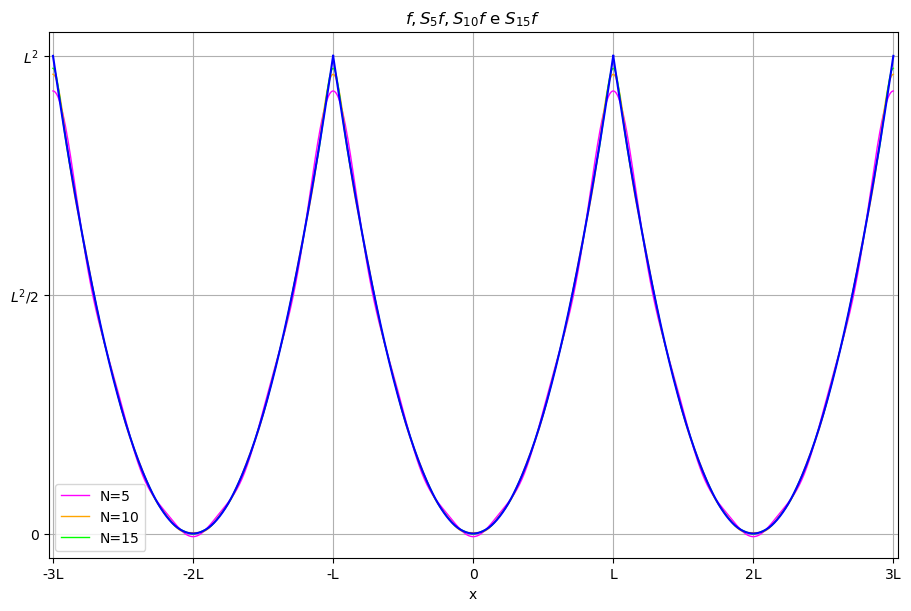

In [5]:
M = 100 # Relativo à quantidade de pontos numa malha para plotar

# Tamanho da figura e janelas
figsize = (9, 6)
colunas = 1
linhas = 1
fig, ax = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)

#Configurações do gráfico
ax.set_title(r'$f, S_5 f, S_{10} f$ e $S_{15} f$')
ax.set_xlabel('x')
ax.set_xlim((-3*L-0.1,3*L+0.1))
ax.set_ylim((-0.5,L**2+0.5))
ax.set_xticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi], 
       ['-3L', '-2L', '-L', '0' , 'L', '2L', '3L'])
ax.set_yticks([0, np.pi**2/2, np.pi**2], ['0', r'$L^2/2$', r'$L^2$'])

#Plotar somas parciais de Fourier
malha_x = np.linspace(-3*L, 3*L, num=10*M + 1)
ax.plot(malha_x, S_N(malha_x,5),'-',color = 'magenta',linewidth=1, label = 'N=5')
ax.plot(malha_x, S_N(malha_x,10),'-',color = 'orange',linewidth=1, label = 'N=10')
ax.plot(malha_x, S_N(malha_x,15),'-',color = 'lime',linewidth=1, label = 'N=15')

#Função $f$
malha_x = np.linspace(-L, L, num=2*M + 1)
ax.plot(malha_x-2*L, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.plot(malha_x, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.plot(malha_x+2*L, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.grid(True)
ax.legend();

Observamos que neste caso a convergência ocorre bem rápido. Por isso quase não se enxergam as cores verde a laranja no gráfico acima. Isto ocorre porque a função $f$ não apresenta descontinuidades.